# DevGPT Prompts

In [2]:
import json
import os

root_dir = "../DevGPT"
chats = {}
if os.path.exists('chats.json'):
    with open('chats.json', 'r') as f:
        chats = json.load(f)
    print("Loaded", len(chats), "chats")
else:
    # OS Walk
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith(".json"):
                file_path = os.path.join(root, file)
                with open(file_path, 'r') as f:
                    data = json.load(f)
                
                for source in data["Sources"]:
                    for chat in source["ChatgptSharing"]:
                        # If Status is 200 and Conversations is not empty
                        if chat["Status"] == 200 and chat["Conversations"]:
                            chats[chat["URL"]] = chat
                print(file, len(chats))

    # Save to JSON
    with open('chats.json', 'w') as f:
        json.dump(chats, f, indent=4)

Loaded 2496 chats


# Getting Meaningful Prompts for DevGPT

In [3]:
# Getting all prompts
# ASSUMPTION: All chats are unique
all_prompts = {}
all_prompts["Prompts"] = []
for url, chat in chats.items():
    for convo in chat["Conversations"]:
        all_prompts["Prompts"].append(convo["Prompt"])

# Save to JSON
with open('prompts.json', 'w') as f:
    json.dump(all_prompts, f, indent=4)

# Character Length vs. Frequency

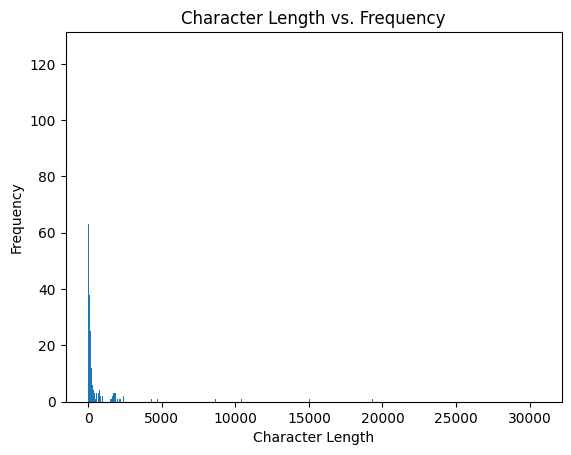

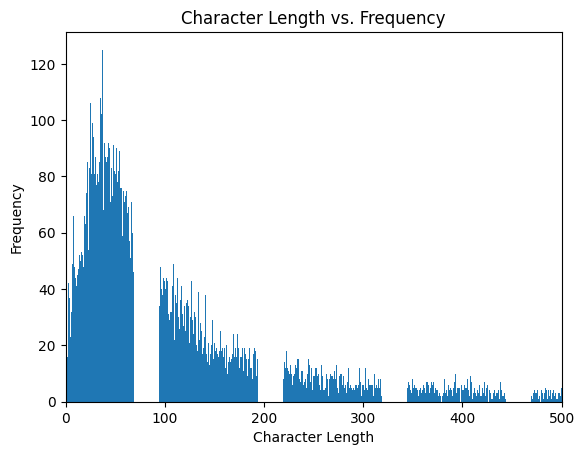

In [4]:
# Character Length vs. Frquency
char_freq = {}
for prompt in all_prompts["Prompts"]:
    char_freq[len(prompt)] = char_freq.get(len(prompt), 0) + 1

# Plot
import matplotlib.pyplot as plt
plt.bar(char_freq.keys(), char_freq.values())
plt.xlabel("Character Length")
plt.ylabel("Frequency")
plt.title("Character Length vs. Frequency")
plt.show()

# Zoom in
plt.bar(char_freq.keys(), char_freq.values())
plt.xlabel("Character Length")
plt.ylabel("Frequency")
plt.title("Character Length vs. Frequency")
plt.xlim(0, 500)
plt.show()